# Analysis #7:Hymenopteran family duplication
Author: Leo BLONDEL


### Requires inputs
- ../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.fasta


### Description
Generates the phylogenetic tree for Figure 4. Studies of Hymenopteran oskar sequences and the duplication events within this order. 

# Extract Hymenopteran Oskar Sequences

In [71]:
import pandas as pd
from Bio import SeqIO

In [72]:
handle = SeqIO.parse('../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.fasta', 'fasta')
seqs = [s for s in handle if 'Hymenoptera' in s.description]
SeqIO.write(seqs, '../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR.fasta', 'fasta')

175

In [87]:
# Define duplicated sequences
names = []
tmp = {}
for s in seqs:
    name = s.description.split(' ')[0]
    if not 'XP' in name:
        name = name.split('_')[0]
    spec = " ".join(s.description.split(' ')[1:]).split('|')[0]
    fam = " ".join(s.description.split(' ')[1:]).split('|')[1]
    order = " ".join(s.description.split(' ')[1:]).split('|')[2]
    if spec not in tmp:
        tmp[spec] = []
    tmp[spec].append(s)
    names.append([name, spec, fam, order])
    
duplicated = []
for spec in tmp:
    if len(tmp[spec]) > 1:
        for s in tmp[spec]:
            name = s.description.split(' ')[0]
            if not 'XP' in name:
                name = name.split('_')[0]
            duplicated.append(name)
            
nametable = pd.DataFrame(names, columns=['ID','Specie' , 'Family', 'Order'])

## We are going to use PRANK to align this because the sequences are not too far appart, but first we do a rought alignment with HMMalign

In [12]:
!ls ../Data/

01_Oskar_identification     insect_phylogeny.newick	  Tables
02_Oskar_analyses	    lepidoptera_phylogeny.newick
03_Oskar_scores_generation  Oskar_hmm


In [13]:
!hmmalign -o ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_align.sto ../Data/Oskar_hmm/V4/OSKAR_CONSENSUS.hmm ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR.fasta 

In [14]:
SeqIO.convert('../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_align.sto', 'stockholm', '../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_align.fasta', 'fasta')

175

In [ ]:
!prank -d=../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_align.fasta -o=../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.fasta -f='fasta'


-----------------
 PRANK v.170427:
-----------------

Input for the analysis
 - aligning sequences in '../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_align.fasta'
 - using inferred alignment guide tree
 - option '+F' is not used; it can be enabled with '+F'
 - external tools available:
    MAFFT for initial alignment
    Exonerate for alignment anchoring


Correcting (arbitrarily) for multifurcating nodes.
Correcting (arbitrarily) for multifurcating nodes.

Generating multiple alignment: iteration 1.


In [41]:
!trimal -in ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.nex.best.nex -out ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta -gt 0.5 -fasta

In [42]:
from Bio import SeqIO

In [52]:
handle = SeqIO.parse('../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta', 'fasta')
seqs = [s for s in handle]

In [53]:
for s in seqs:
    n = s.name.replace("'","")
    if 'XP' in n:
        n = "_".join(n.split('_')[:2])
    else:
        n = n.split('_')[0]
    s.id = n
    s.name = n
    s.description = n
SeqIO.write(seqs, '../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta', 'fasta')

175

# Infering Phylogeny with RaxML

We let RaxML decide what model fits the data best with -n AUTO
- PROT for proteins
- GAMMA distributed
- #1000 for a thousand bootstrap
- -p seed 
- -b bootstrap seed
- -T 6 for 6 cores

In [ ]:
!raxmlHPC-PTHREADS \
-p 12345 \
-b 12345 \
-N 1000 \
-m PROTGAMMAAUTO \
-s ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta \
-n Hymenoptera_Phylogeny \
-T 6


RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file



IMPORTANT WARNING: Sequences GDFS01087542.1 and GDFS01087539.1 are exactly identical


IMPORTANT WARNING: Sequences g21709.t1 and g20142.t1 are exactly identical

IMPORTANT WARNING
Found 2 sequences that are exactly identical to other sequences in the alignment.
Normally they should be excluded from the analysis.

Just in case you might need it, an alignment file with 
sequence duplicates removed is printed to file ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta.reduced

This is the RAxML Master Pthread

This is RAxML Worker Pthread Number: 1

This is RAxML Worker Pthread Number: 2

This is RAxML Worker Pthread Number: 3

This is RAxML Worker Pthread Number: 4

This is RAxML Worker Pthread Number: 5


This is RAxML version 8.2.11 released by Alexandros Stamatakis on June 2017.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Be

In [ ]:
!raxmlHPC-PTHREADS \
-p 12345 \
-N 20 \
-m PROTGAMMAAUTO \
-s ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta \
-n Hymenoptera_Phylogeny_best \
-T 6


RAxML can't, parse the alignment file as phylip file 
it will now try to parse it as FASTA file



IMPORTANT WARNING: Sequences GDFS01087542.1 and GDFS01087539.1 are exactly identical


IMPORTANT WARNING: Sequences g21709.t1 and g20142.t1 are exactly identical

IMPORTANT WARNING
Found 2 sequences that are exactly identical to other sequences in the alignment.
Normally they should be excluded from the analysis.

An alignment file with sequence duplicates removed has already
been printed to file ../Data/02_Oskar_analyses/2.7/Hymenoptera_OSKAR_prank_align.trimmed_0.5.fasta.reduced

This is the RAxML Master Pthread

This is RAxML Worker Pthread Number: 1

This is RAxML Worker Pthread Number: 2

This is RAxML Worker Pthread Number: 3

This is RAxML Worker Pthread Number: 4

This is RAxML Worker Pthread Number: 5


This is RAxML version 8.2.11 released by Alexandros Stamatakis on June 2017.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Al

In [64]:
!raxmlHPC-PTHREADS \
-p 12345 \
-f b \
-m PROTGAMMAAUTO \
-t RAxML_bestTree.Hymenoptera_Phylogeny_best \
-z RAxML_bootstrap.Hymenoptera_Phylogeny \
-n Hymenoptera_Phylogeny_bipartitions


You can specify the number of threads to run via -T numberOfThreads
NumberOfThreads must be set to an integer value greater than 1

RAxML, will now set the number of threads automatically to 2 !

Found a total of 175 taxa in first tree of tree collection RAxML_bootstrap.Hymenoptera_Phylogeny
Expecting all remaining trees in collection to have the same taxon set
add [GBTK01006504.1]
add [GBLN01013985.1]
add [GBLM01012162.1]
add [XP_014212910.1]
add [GBVC01015078.1]
add [g20954.t1]
add [g18460.t1]
add [GBMN01039564.1]
add [GBUE01029013.1]
add [GBUE01008958.1]
add [GBWL01021843.1]
add [GBVR01016885.1]
add [g1130.t1]
add [g25413.t1]
add [GECT01011720.1]
add [GBEC01006292.1]
add [GBEB01011572.1]
add [g46902.t1]
add [g13646.t1]
add [GBNA01025404.1]
add [GBNA01025413.1]
add [GBWB01017660.1]
add [g14693.t1]
add [g3908.t1]
add [GBPD01016273.1]
add [GBQA01027340.1]
add [g43237.t1]
add [GCPB01088062.1]
add [GBLE01034275.1]
add [GBUD01015499.1]
add [GBUU01026587.1]
add [g9944.t1]
add [g21322.t1]


In [65]:
!ls -ltr

total 31472
drwxrwxr-x 3 lblondel lblondel     4096 Nov 19  2019 INPUTS
-rw-rw-r-- 1 lblondel lblondel     7346 Nov 19  2019 MCA.py
-rw-rw-r-- 1 lblondel lblondel     1458 Nov 19  2019 icon_pupae.png
-rw-rw-r-- 1 lblondel lblondel     1182 Nov 19  2019 icon_larvae.png
-rw-rw-r-- 1 lblondel lblondel     1146 Nov 19  2019 icon_juvenil.png
-rw-rw-r-- 1 lblondel lblondel     1146 Nov 19  2019 icon_juvenile.png
-rw-rw-r-- 1 lblondel lblondel     1349 Nov 19  2019 icon_germline.png
-rw-rw-r-- 1 lblondel lblondel      940 Nov 19  2019 icon_egg.png
-rw-rw-r-- 1 lblondel lblondel     1765 Nov 19  2019 icon_brain.png
-rw-rw-r-- 1 lblondel lblondel     1572 Nov 19  2019 icon_adult.png
-rw-rw-r-- 1 lblondel lblondel     1666 Nov 19  2019 get_Infos.py
-rw-rw-r-- 1 lblondel lblondel   346171 Aug 11 14:07 2.10_Long_Oskar_Evolution.ipynb
-rw-rw-r-- 1 lblondel lblondel   101902 Aug 11 14:07 2.2_Oskar_insect_repartition.ipynb
-rw-rw-r-- 1 lblondel lblondel   368781 Aug 11 14:07 2.1_Oskar_discovery_quali

In [66]:
!mv RAxML* ../Data/02_Oskar_analyses/2.7/

In [ ]:

# 

# MrBayes logs

Go to http://sequenceconversion.bugaco.com/converter/biology/sequences/fasta_to_nexus.php

And use the fasta to nexus converter to convert the trimmed down version to fasta then launch MrBayes 

Version=MrBayes 3.2.7a x86_64

Prompt commands
```
lset Nucmodel=Protein Code=Universal 
prset aamodelpr=mixed
mcmc
```
 

In [2]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import ete3
import pandas as pd

from ete3 import Tree, faces, TreeStyle, TextFace

## Defining the isoforms, duplicated sequences, and names for each sequences

In [89]:
def make_tree(faces=False):
    T = ete3.Tree('../Data/02_Oskar_analyses/2.7/RAxML_bipartitions.Hymenoptera_Phylogeny_bipartitions')  
    for leaf in T:
        if 'GBKM01001402.1' in leaf.name:
            out1 = leaf
        if 'GBQG01014503.1' in leaf.name:
            out2 = leaf
    root = T.get_common_ancestor(out1, out2)
    T.set_outgroup(root)
    for leaf in T:
        n = leaf.name
        n = n.replace("'","")
        if faces:
            leaf.name = '  ' + n
            sp_name = nametable[nametable['ID'] == n]['Specie'].values[0].replace('_', ' ')
            sp_name = sp_name[0].upper() + sp_name[1:]
            fam_name = nametable[nametable['ID'] == n]['Family'].values[0]
            F = TextFace(sp_name, fstyle='italic', fsize=14)
            leaf.add_face(F, column=1, position="aligned")
            F = TextFace(fam_name, fsize=14)
            leaf.add_face(F, column=2, position="aligned")
        else:
            sp_name = nametable[nametable['ID'] == n]['Specie'].values[0].replace('_', ' ')
            sp_name = sp_name[0].upper() + sp_name[1:]
            fam_name = nametable[nametable['ID'] == n]['Family'].values[0]
            leaf.name = '  ' + fam_name + '  '
            F = TextFace(sp_name, fstyle='italic', fsize=16)
            F.margin_left = 5
            leaf.add_face(F, column=1)
        nstyle = ete3.NodeStyle()
        if n in duplicated:
            nstyle["fgcolor"] = "#b96565"
            nstyle["size"] = 22
        else:
            nstyle["fgcolor"] = "#8f8f8f"
            nstyle["size"] = 22
        leaf.set_style(nstyle)
    return T

## Defining the Tree Style for plotting

In [123]:
ts = ete3.TreeStyle()
ts.scale = 20
ts.tree_width = 600
ts.draw_guiding_lines = True
ts.optimal_scale_level = 'full'
ts.show_branch_support = False
ts.show_scale = False
ts.show_leaf_name = True
ts.force_topology = True
ts.complete_branch_lines_when_necessary = True

## Rendering linear version of the tree

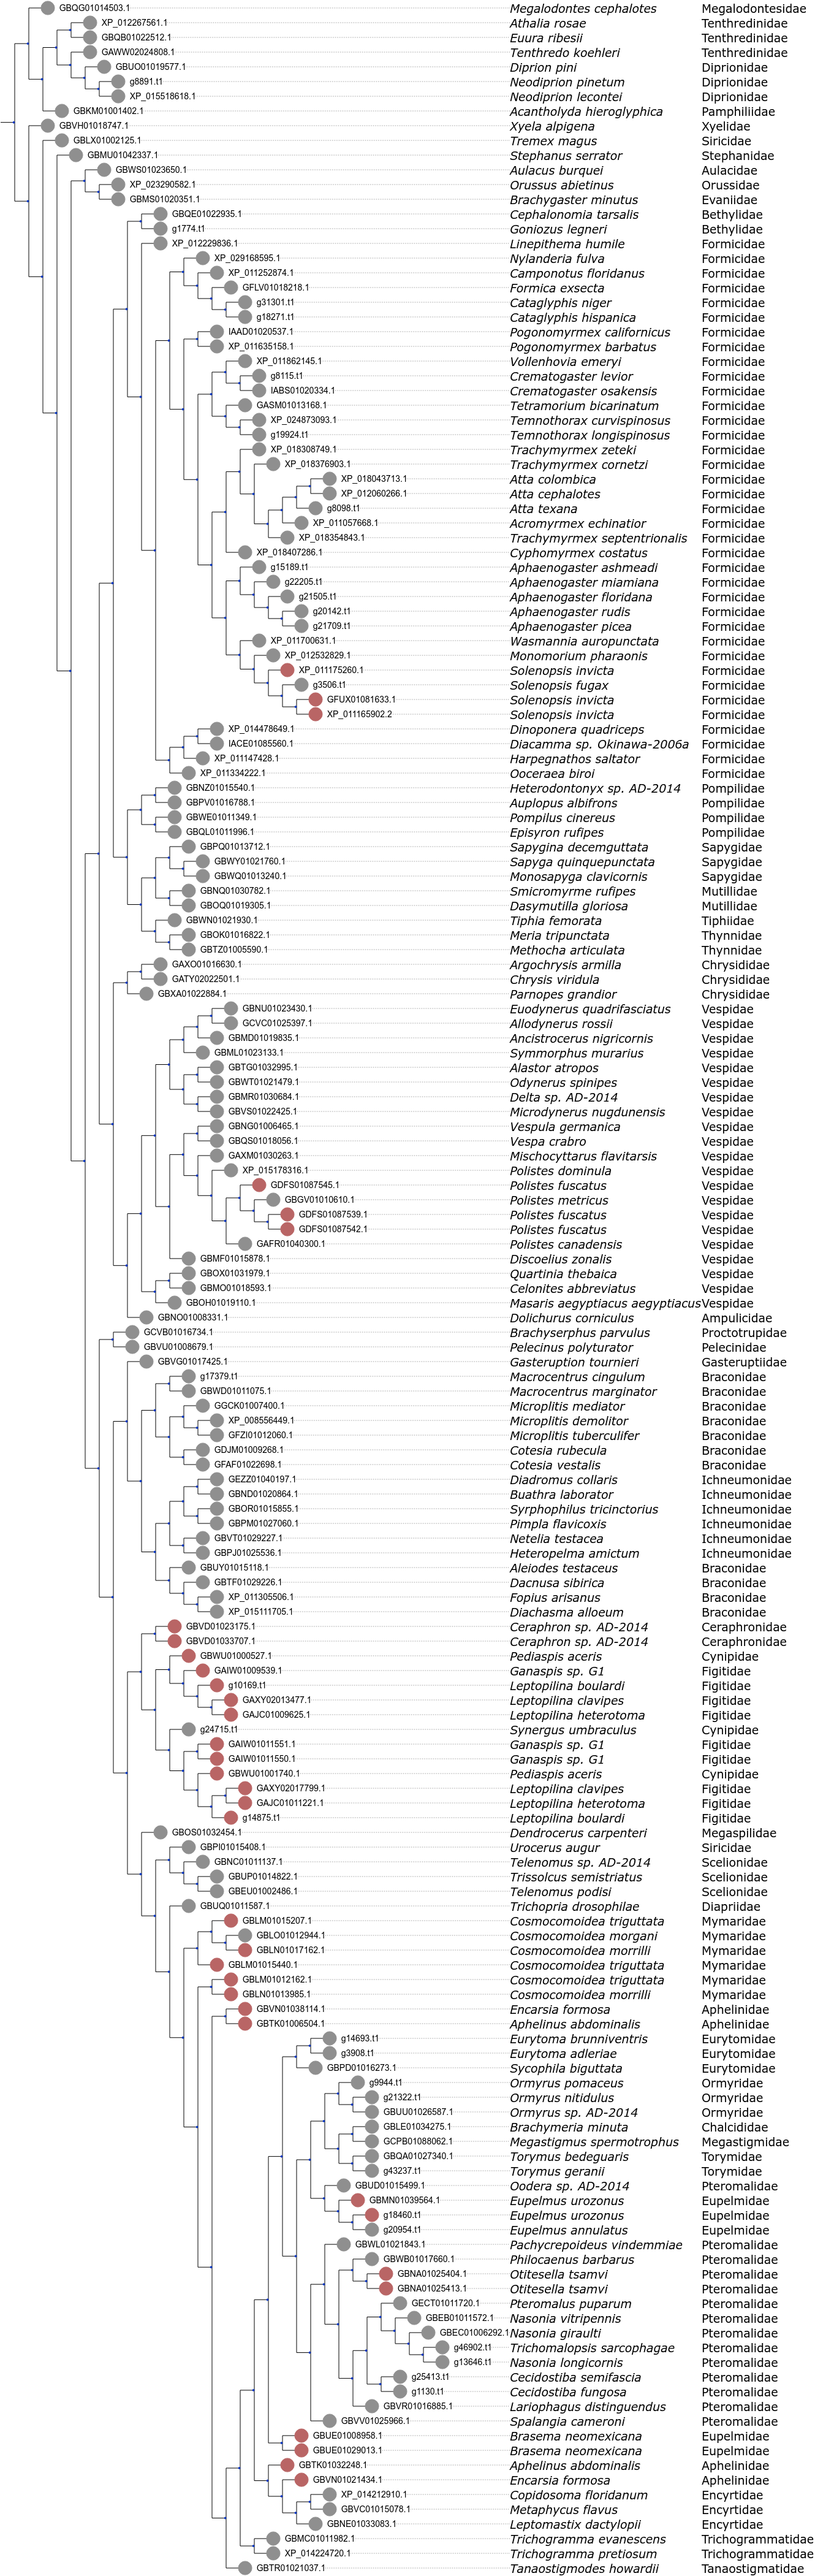

In [124]:
T = make_tree(faces=True)
ts.mode = "r"
T.render('%%inline', tree_style=ts)

In [126]:
T.render("../Figures/RAW/SVG/F3_v1.svg", tree_style=ts)

{'faces': [[204.0, 293.0, 320.0, 309.0, 26, '  XP_023290582.1'],
  [832.0, 289.0, 1002.0, 313.0, 26, 'Orussus abietinus'],
  [1145.0, 289.0, 1240.0, 313.0, 26, 'Orussidae'],
  [457.0, 1061.0, 573.0, 1077.0, 93, '  XP_012532829.1'],
  [832.0, 1057.0, 1057.0, 1081.0, 93, 'Monomorium pharaonis'],
  [1145.0, 1057.0, 1249.0, 1081.0, 93, 'Formicidae'],
  [503.0, 1013.0, 573.0, 1029.0, 89, '  g21709.t1'],
  [832.0, 1009.0, 1032.0, 1033.0, 89, 'Aphaenogaster picea'],
  [1145.0, 1009.0, 1249.0, 1033.0, 89, 'Formicidae'],
  [388.0, 1901.0, 504.0, 1917.0, 163, '  XP_015178316.1'],
  [832.0, 1897.0, 999.0, 1921.0, 163, 'Polistes dominula'],
  [1145.0, 1897.0, 1230.0, 1921.0, 163, 'Vespidae'],
  [388.0, 1661.0, 511.0, 1677.0, 145, '  GCVC01025397.1'],
  [832.0, 1657.0, 1001.0, 1681.0, 145, 'Allodynerus rossii'],
  [1145.0, 1657.0, 1230.0, 1681.0, 145, 'Vespidae'],
  [296.0, 2669.0, 418.0, 2685.0, 224, '  GBVD01033707.1'],
  [832.0, 2665.0, 1058.0, 2689.0, 224, 'Ceraphron sp. AD-2014'],
  [1145.0, 2

## Rendering circular version of the tree ONLY KEEPING the duplicated families

In [147]:
def make_tree(faces=False):
    T = ete3.Tree('../Data/02_Oskar_analyses/2.7/RAxML_bipartitions.Hymenoptera_Phylogeny_bipartitions')  
    for leaf in T:
        if 'GBKM01001402.1' in leaf.name:
            out1 = leaf
        if 'GBQG01014503.1' in leaf.name:
            out2 = leaf
    root = T.get_common_ancestor(out1, out2)
    T.set_outgroup(root)
    tokeep = nametable[nametable['ID'].isin(duplicated)]['Family'].unique()
    for leaf in T:
        fam_name = nametable[nametable['ID'] == leaf.name]['Family'].values[0]
        if fam_name not in tokeep:
            leaf.delete()
    for leaf in T:
        n = leaf.name
        n = n.replace("'","")
        sp_name = nametable[nametable['ID'] == n]['Specie'].values[0].replace('_', ' ')
        sp_name = sp_name[0].upper() + sp_name[1:]
        fam_name = nametable[nametable['ID'] == n]['Family'].values[0]
        leaf.name = '  ' + fam_name + '  '
        F = TextFace(sp_name, fstyle='italic', fsize=16)
        F.margin_left = 5
        leaf.add_face(F, column=1)
        nstyle = ete3.NodeStyle()
        if n in duplicated:
            nstyle["fgcolor"] = "#b96565"
            nstyle["size"] = 22
        else:
            nstyle["fgcolor"] = "#8f8f8f"
            nstyle["size"] = 22
        leaf.set_style(nstyle)
    return T

In [148]:
ts = ete3.TreeStyle()
ts.mode = "c"
ts.scale = 450
ts.tree_width = 600
ts.draw_guiding_lines = True
ts.optimal_scale_level = 'mid'
ts.show_branch_support = False
ts.show_scale = False
ts.show_leaf_name = True
ts.complete_branch_lines_when_necessary = True

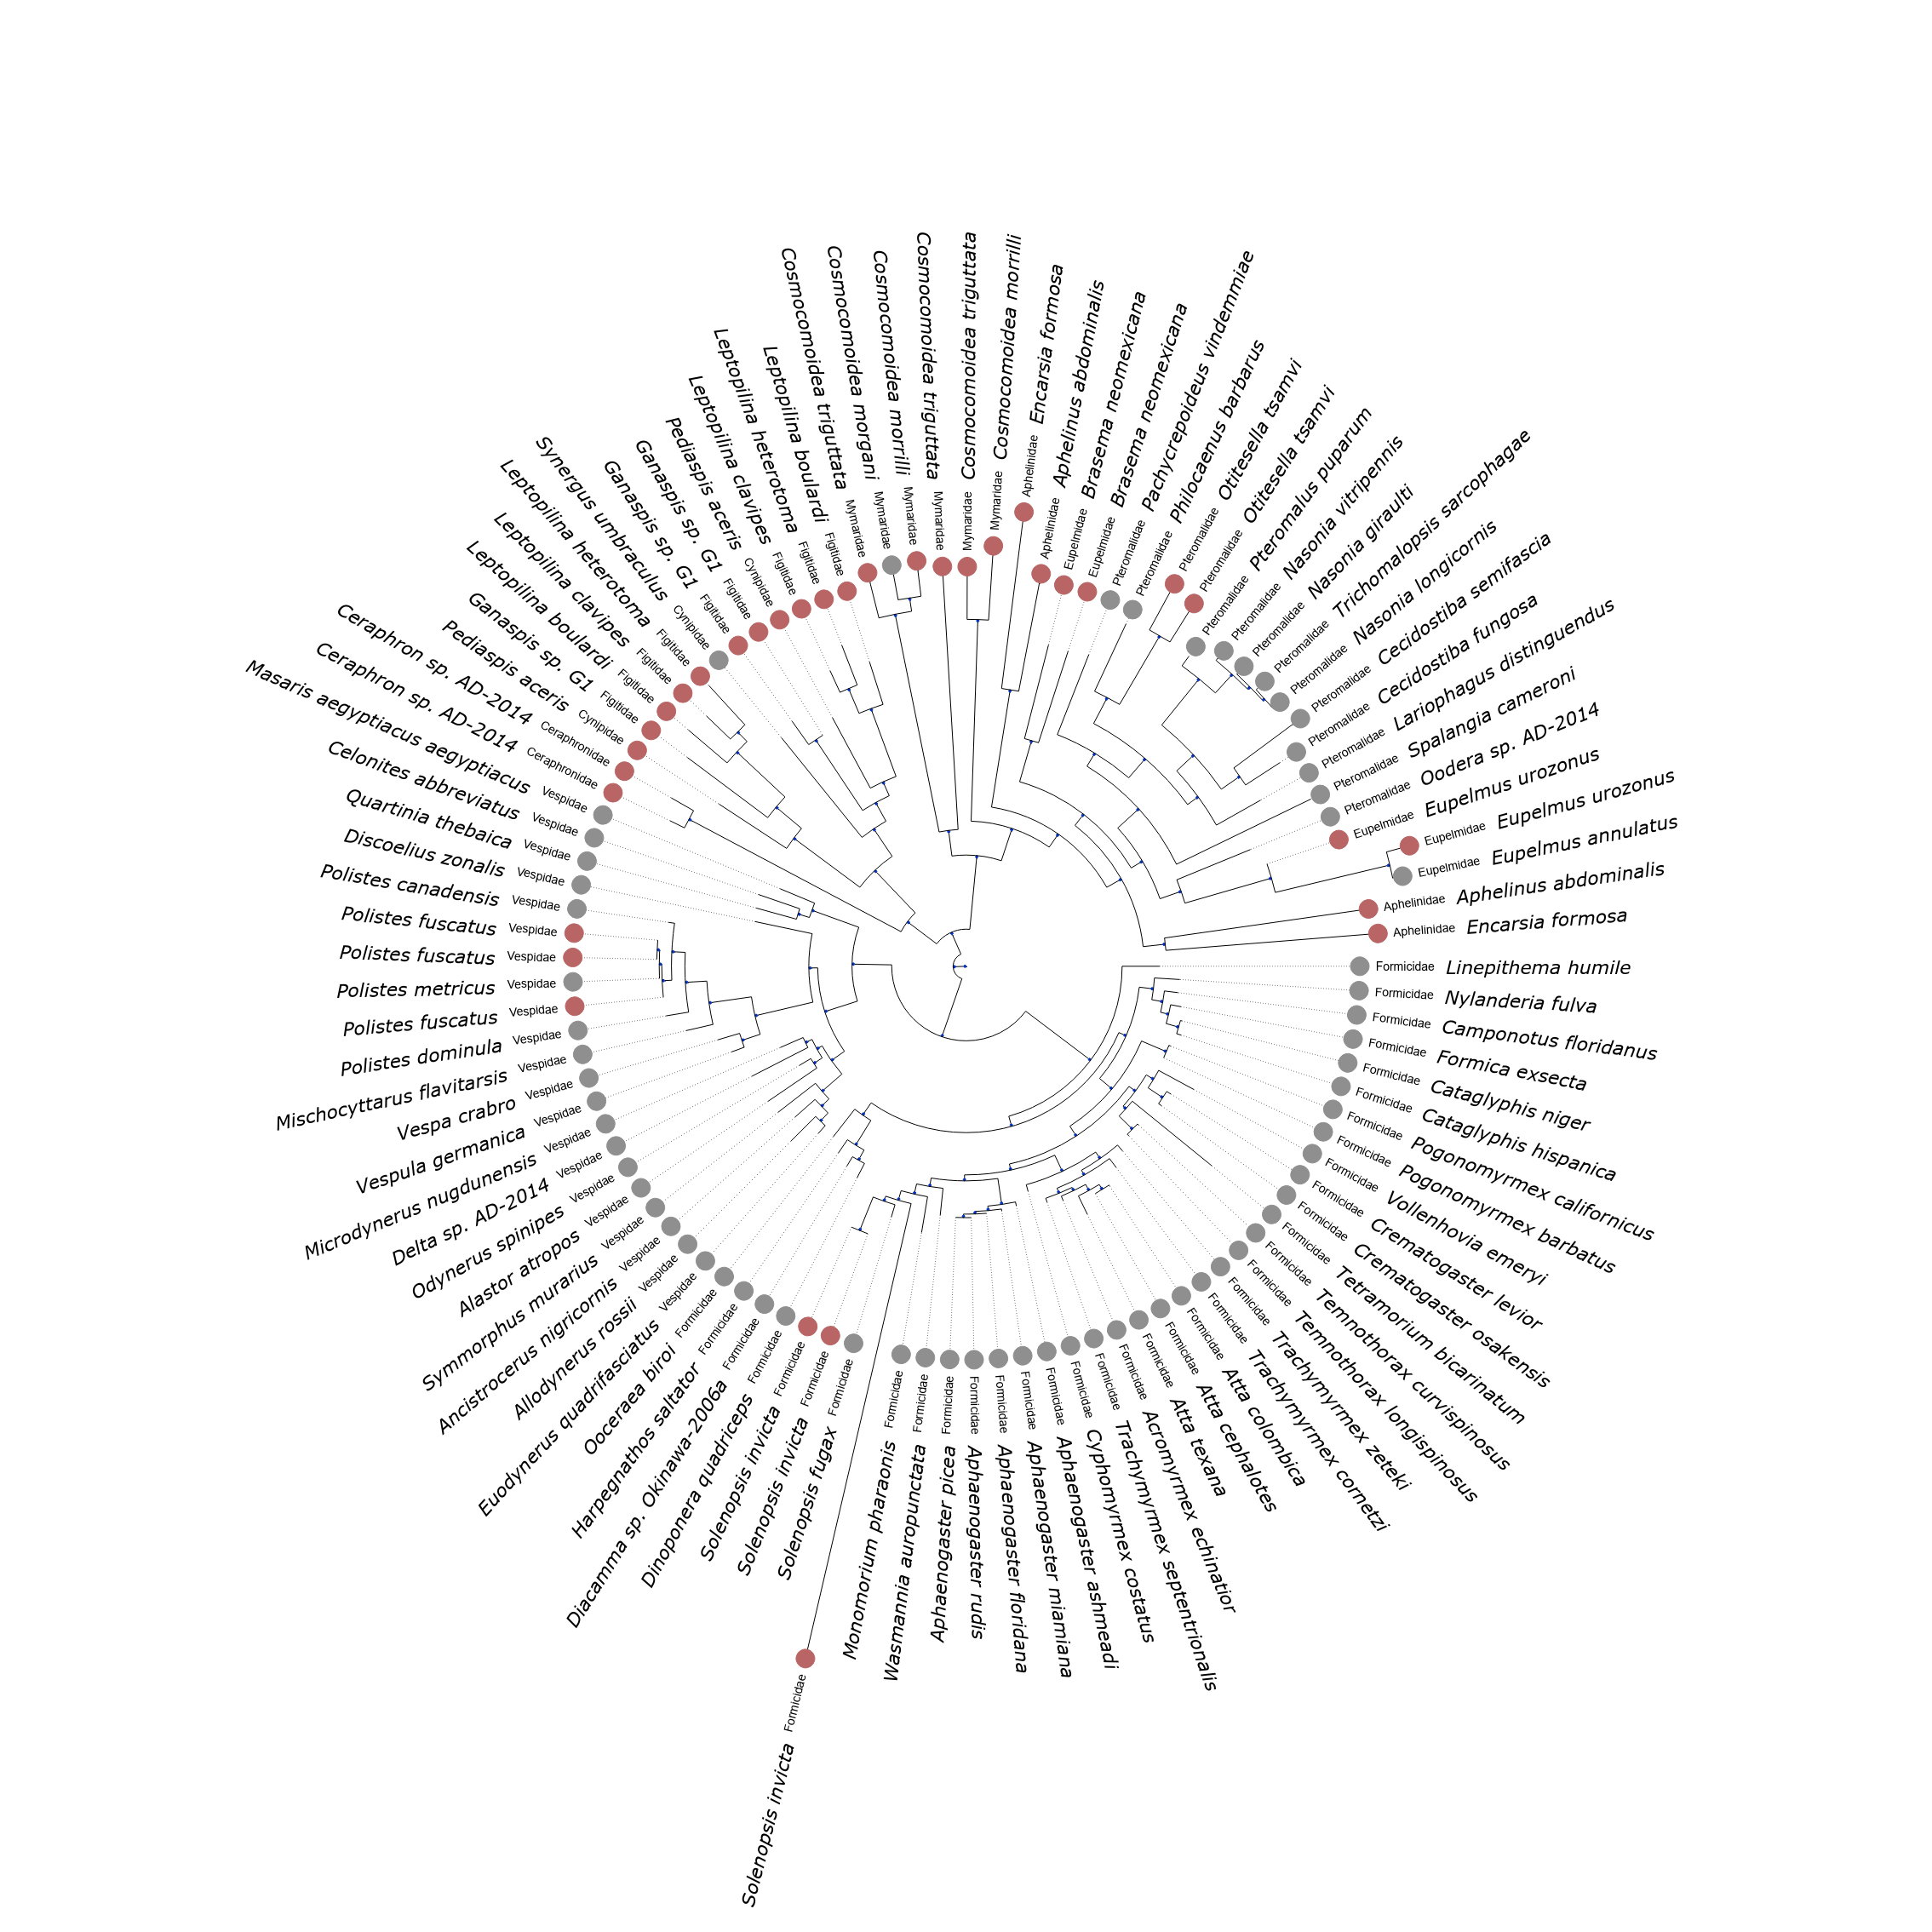

In [149]:
T = make_tree(faces=False)
T.render('%%inline', tree_style=ts)

In [150]:
T.render("../Figures/RAW/SVG/F3_v2.svg", tree_style=ts)

{'faces': [[1272.7192742080115,
   596.4405346801759,
   1315.6222242884264,
   686.9993712652234,
   165,
   '  Eupelmidae  '],
  [1296.2261205912434,
   351.0021032521576,
   1400.0610391467405,
   598.448679787831,
   165,
   'Brasema neomexicana'],
  [1434.36540171907,
   1490.8643975711605,
   1501.4858776630813,
   1566.0863647874135,
   35,
   '  Formicidae  '],
  [1487.9214887603412,
   1555.6921246433762,
   1664.3260896929264,
   1756.988263977631,
   35,
   'Trachymyrmex zeteki'],
  [1616.9857094510828,
   1045.6104508400913,
   1706.362745130553,
   1073.8633364237692,
   200,
   '  Aphelinidae  '],
  [1708.2095393241223,
   1003.9834740736331,
   1957.6795145867432,
   1066.6852129324443,
   200,
   'Aphelinus abdominalis'],
  [1280.5994327524445,
   1579.8699457448151,
   1323.2840792614738,
   1665.4675221649204,
   46,
   '  Formicidae  '],
  [1304.092042573041,
   1663.0675015286474,
   1439.8014811492708,
   1990.9522349240424,
   46,
   'Trachymyrmex septentrionalis'